In [1]:
import pygmt
import numpy as np
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as colours
import os
import requests
import geopandas as gpd
import shapely
import json
import cartopy.crs as ccrs
import shapely

from utils import get_australian_sedimentary_basins, australia_basemap


In [2]:
gdf = get_australian_sedimentary_basins()
gdf.set_index("provinceName", inplace=True)

plot [WARNING]: Your data array row 44 contains NaNs - no resampling taken place!


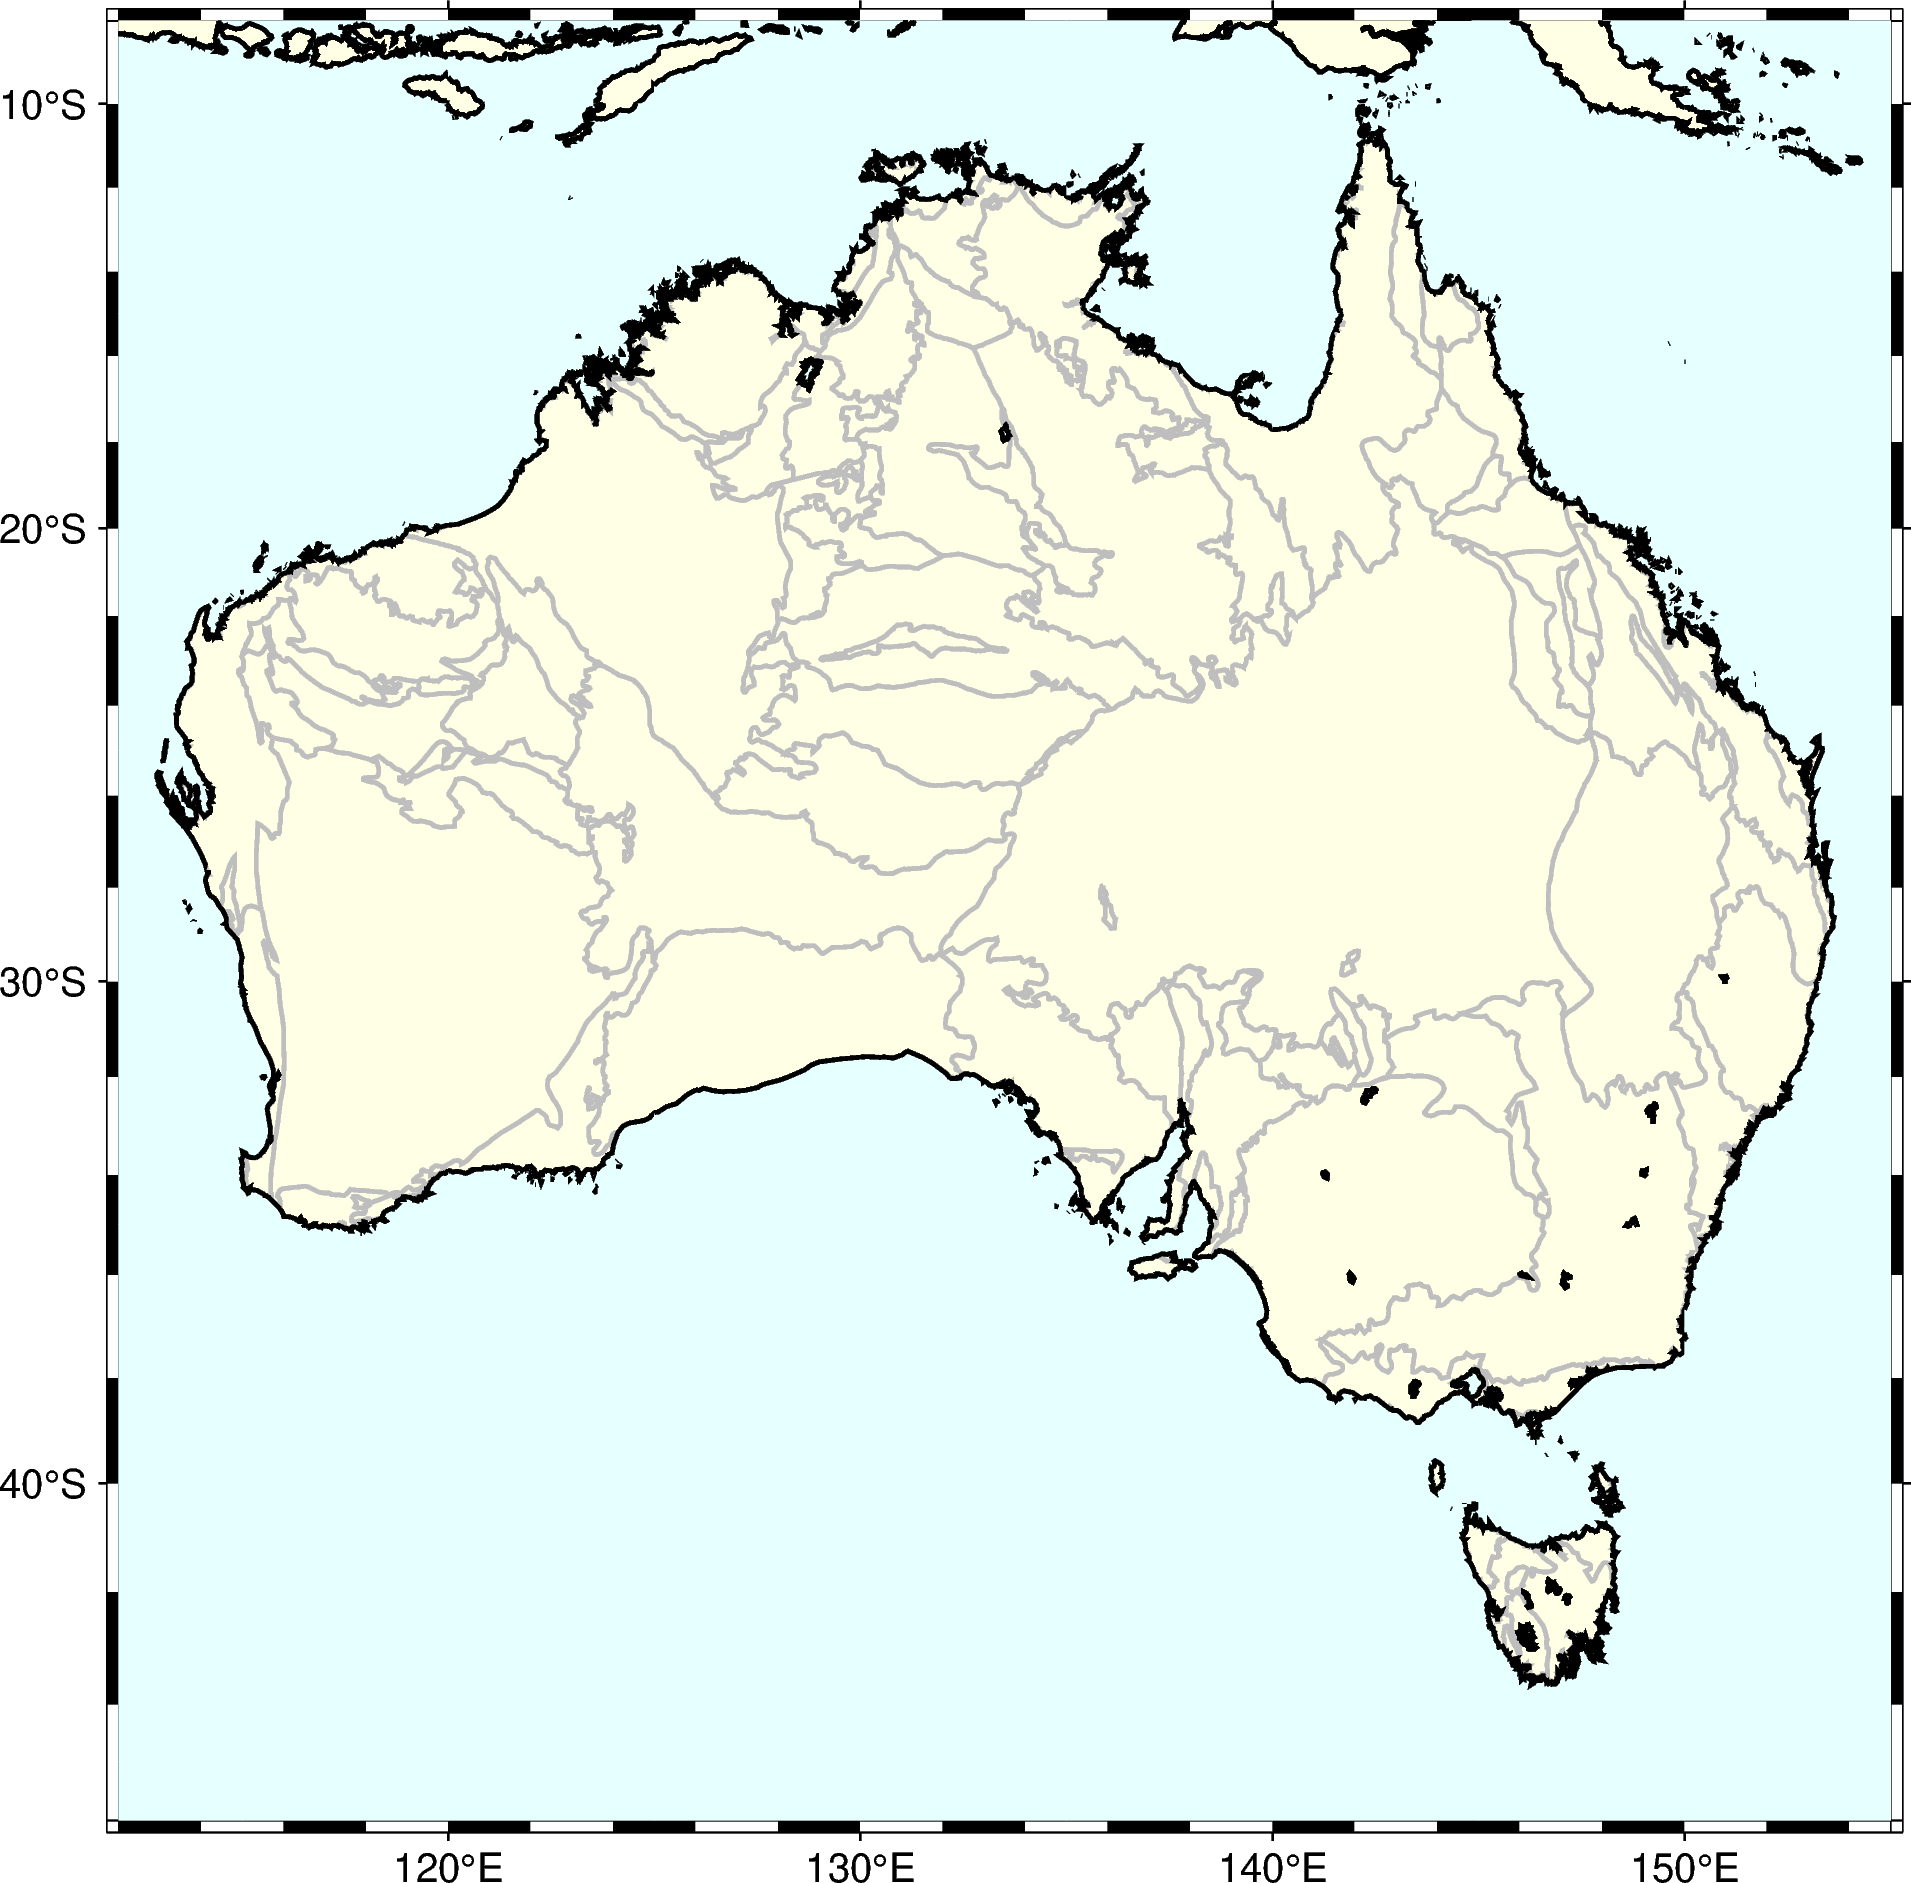

In [3]:
fig, _, _ = australia_basemap()
fig.show()

plot [WARNING]: Long input record (5084 bytes) was truncated to first 4093 bytes!
plot [WARNING]: Long input record (4244 bytes) was truncated to first 4093 bytes!
/var/folders/3z/q924mq751jgf5h_73dyy3vx0gyx48k/T/ipykernel_37697/1124006476.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = key_basins.centroid.unique()


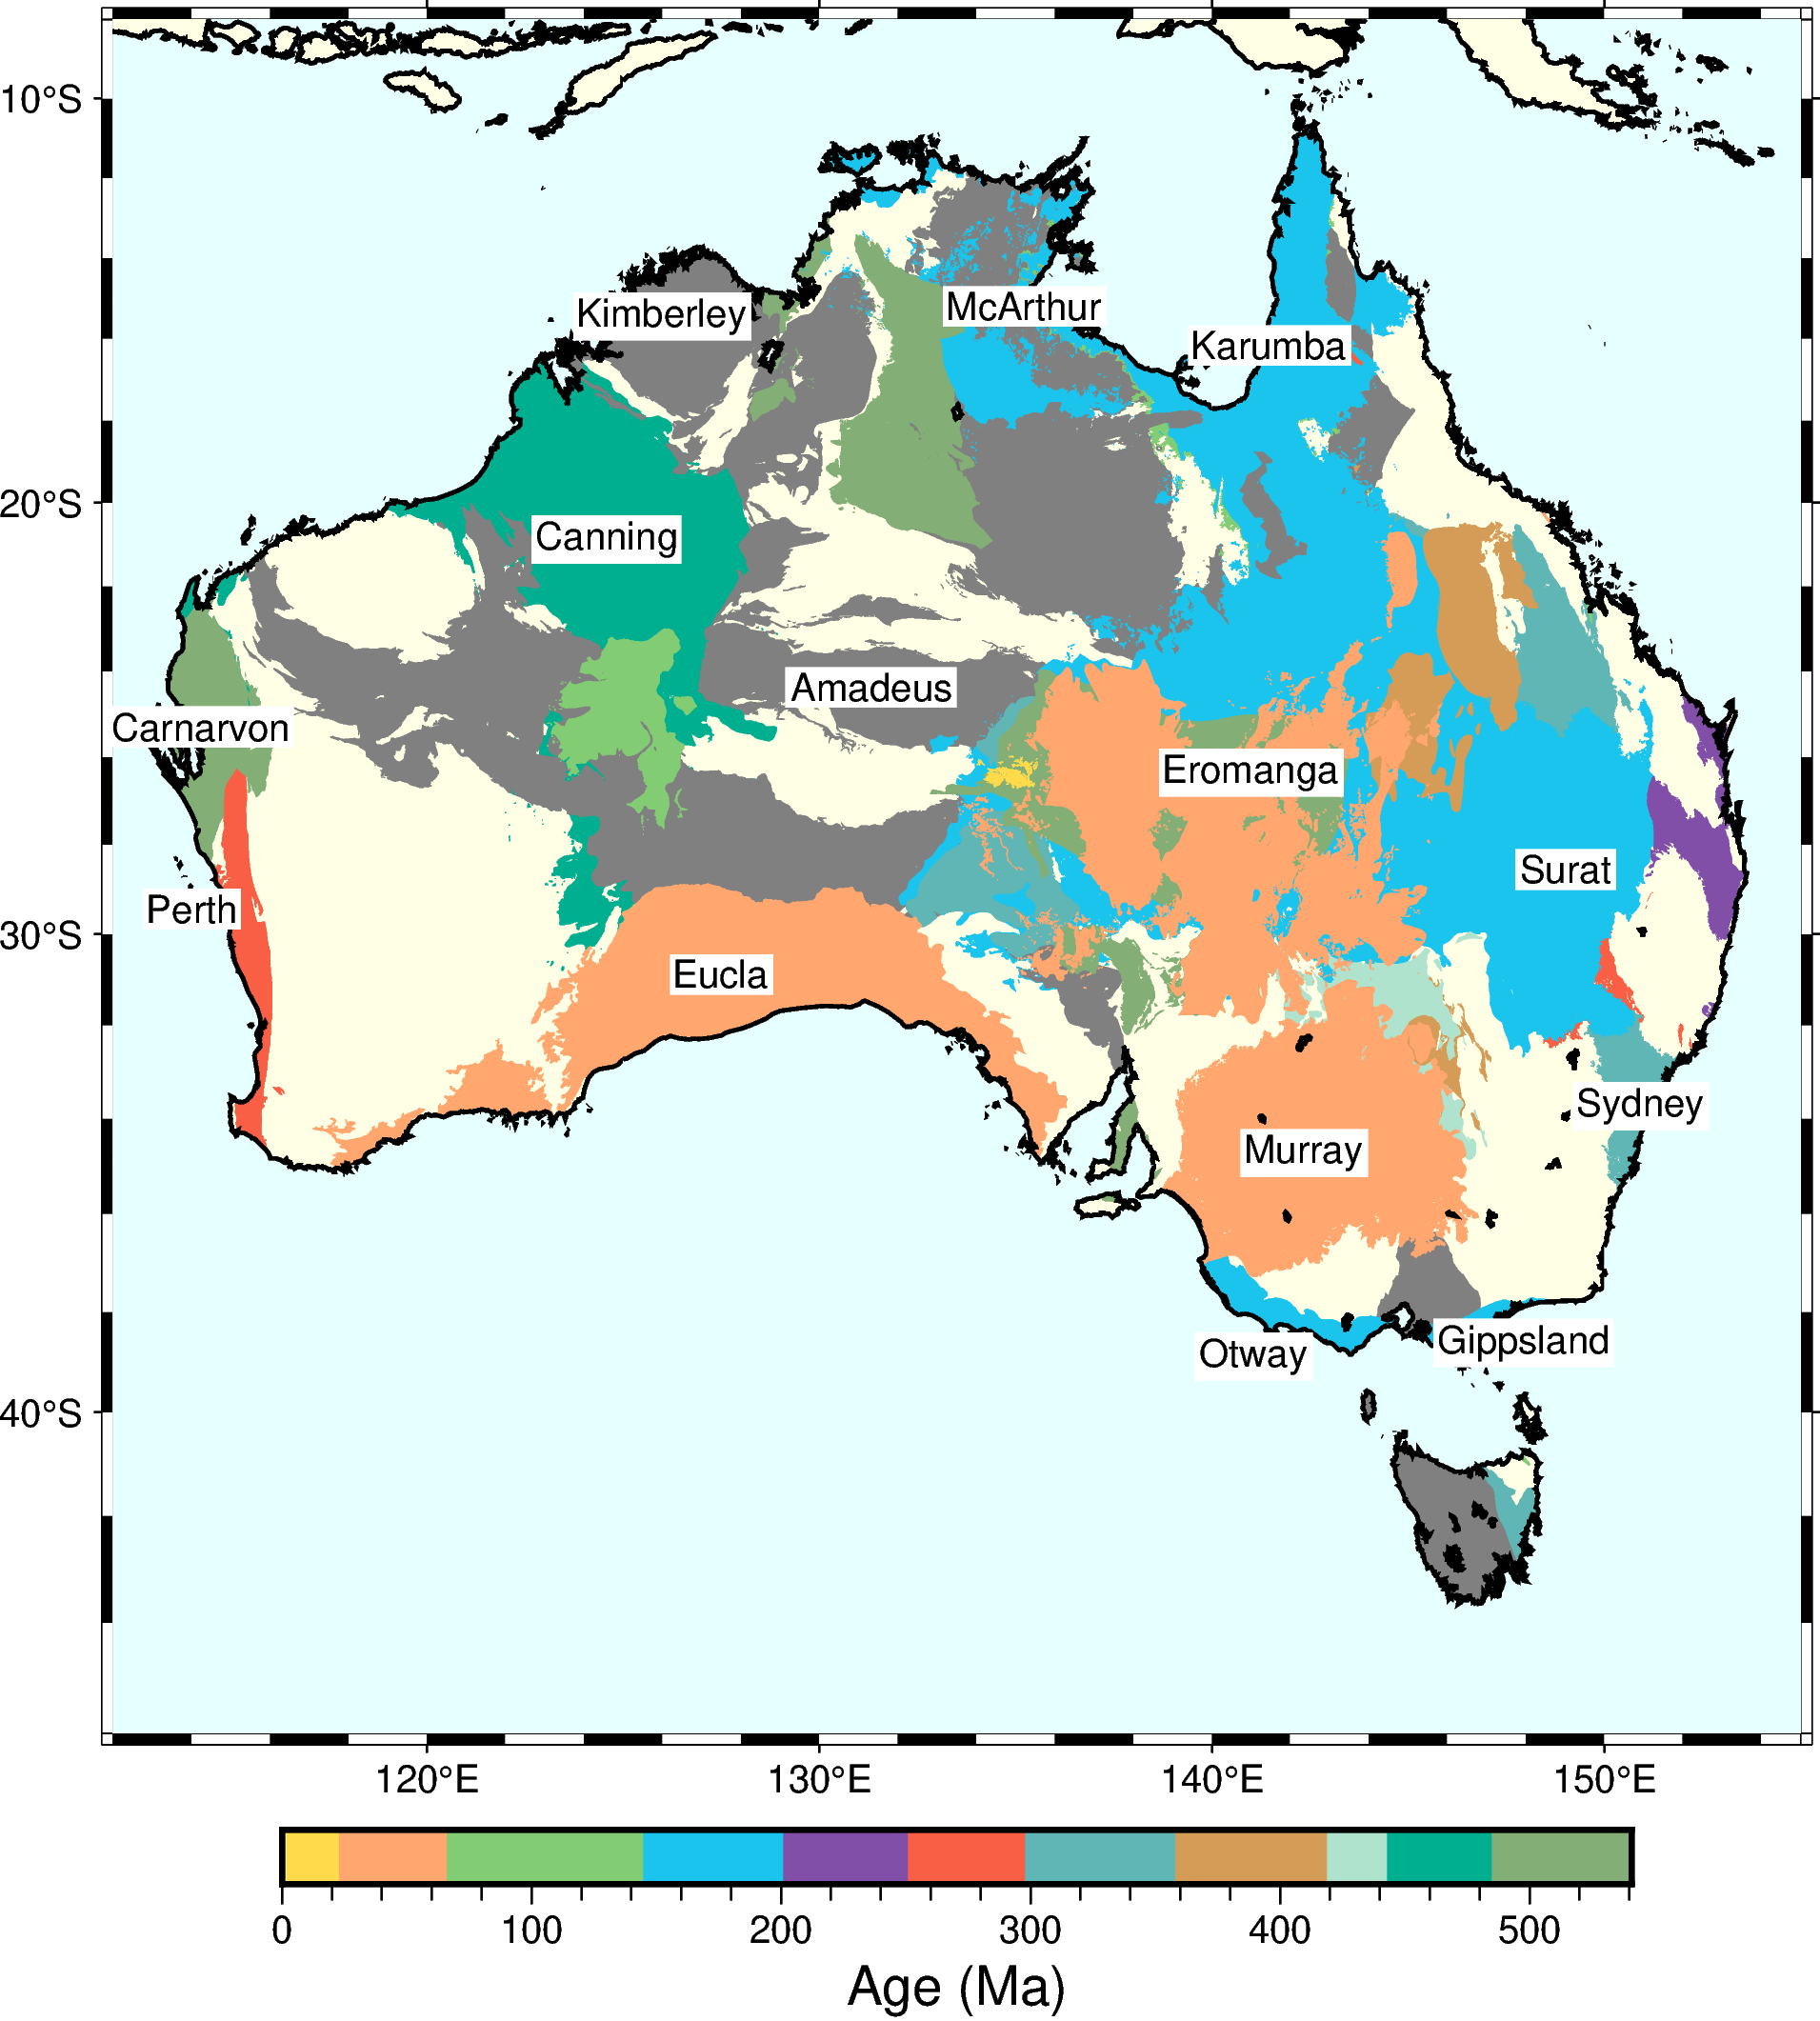

In [4]:
fig, region, projection = australia_basemap(basins=False)
for i, polygon in gdf[::-1].iterrows():  # [::-1] flips the df to plot the oldest first
    # pygmt doesn't seem to have a nice way of colouring polygons
    # from a GeoDataFrame using a column to map to colours
    # so loop through and select the fill
    # Have to wrap each polygon into its own GeoDataFrame
    df = gpd.GeoDataFrame([polygon])
    fill = df["fill"].iloc[0]
    fig.plot(data=df, region=region, projection=projection, fill=fill)
fig.coast(
    region=region,
    projection=projection,
    shorelines=1,
    resolution="i",
    water="#e6ffff",
)
fig.colorbar(region=region, projection=projection, cmap="../data/geological_timescale/geological_timeline.cpt", frame=["af+lAge (Ma)",])

key_basins = gdf.loc[["Eucla Basin", "Murray Basin", "Eromanga Basin", "Perth Basin", "McArthur Basin", "Amadeus Basin", 'Southern Carnarvon Basin', "Kimberley Basin","Canning Basin", "Karumba Basin", "Surat Basin", "Sydney Basin", "Gippsland Basin", "Otway Basin"]]
initials = [" ".join(s.split()[:-1]) for s in key_basins.index]
initials[initials.index("Southern Carnarvon")] = "Carnarvon"
centroids = key_basins.centroid.unique()

# manually shift some labels
_eucla = initials.index("Eucla")
centroids[_eucla] = shapely.Point((centroids[_eucla].x, centroids[_eucla].y + 3))
_carnarvon = initials.index("Carnarvon")
centroids[_carnarvon] = shapely.Point((centroids[_carnarvon].x+0.5, centroids[_carnarvon].y))
_karumba = initials.index("Karumba")
centroids[_karumba] = shapely.Point((centroids[_karumba].x+1.5, centroids[_karumba].y -1))
_canning = initials.index("Canning")
centroids[_canning] = shapely.Point((centroids[_canning].x, centroids[_canning].y + 2))

fig.text(x=centroids.x, y=centroids.y, text=initials, region=region, projection=projection, fill="white")
fig.show()